In [60]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'svg' 

from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

# Adult.csv

In [61]:
adult_df = pd.read_csv('../data/adult.csv')
adult_df.salary = list(map(lambda x: 1 if x == '>50K' else 0, adult_df.salary))

In [62]:
adult_df.head()

age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country  salary  
0          2174             0              40  United-States       0  
1             0             0              13  United-States       0  
2             0             0              40  United-States       0  
3             0             0              40  United-States       0  
4             0             0              40           Cuba       0

In [63]:
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


На следующем графике можно увидеть сколько лет в среднем люди тратили на обучение в зависимости от их возраста.

In [64]:
adult_df[['education-num', 'age']].groupby('age').mean().plot()

<AxesSubplot:xlabel='age'>

Для построения следующего графика пришлось взять только 1000 строк датасета из-за слишком долгого построения.

На графике можно увидеть, что наибольшая часть объектов принимает значение признака "hours-per-week" = 40 (стандартная рабочая неделя), также видно, что в признаке "capital-gain" присутствуют выбросы (слишком большая капитальная прибыль).

Кроме того, нигде не наблюдается линейной зависимости между признаками.

In [65]:
cols = ['age', 'education-num', 'capital-gain', 'hours-per-week', 'salary']
adult_df_shuffle = adult_df.sample(frac=1)
sns.pairplot(adult_df_shuffle[cols].iloc[:1000])

На следующем графике мы можем увидеть, что большинство людей вне зависимости от расы потратили на обучение 9-10 лет

<AxesSubplot:xlabel='education-num', ylabel='race'>

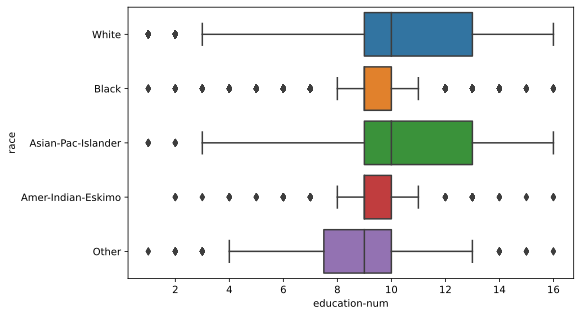

In [66]:
top_races = adult_df.race.value_counts().sort_values(ascending = False).head(5).index.values
sns.boxplot(y="race", x="education-num", data=adult_df[adult_df['race'].isin(top_races)], orient="h")

На следующем графике мы можем видеть какой процент людей с конкретным образованием и конкретной расы получает больше 50К в год. По графику видно, что чаще всего только школьного образования и тем более непоного школьного образования недостаточно для получения больше 50К в год.

<AxesSubplot:xlabel='race', ylabel='education'>

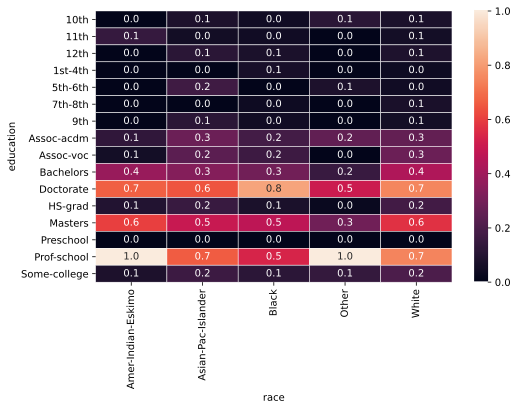

In [67]:
from statistics import mean
platform_genre_sales = adult_df.pivot_table(
                        index='education', 
                        columns='race', 
                        values='salary', 
                        aggfunc=mean).fillna(0).applymap(float)
sns.heatmap(platform_genre_sales, annot=True, fmt=".1f", linewidths=.5)

На следующем графике можно посмотреть сколько в среденем часов в неделю работают мужчины и женщины разных рас. Видно, что мужчины любой расы в среднем работают больше, чем женщины той же расы.

<AxesSubplot:xlabel='sex', ylabel='race'>

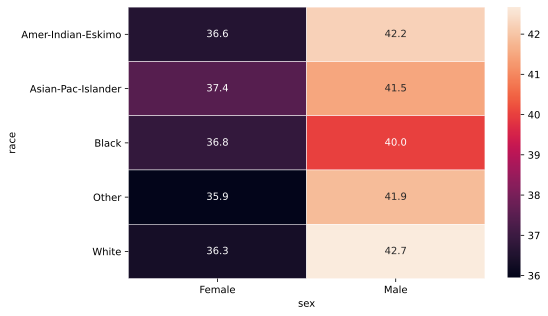

In [52]:
from statistics import mean
platform_genre_sales = adult_df.pivot_table(
                        index='race', 
                        columns='sex', 
                        values='hours-per-week', 
                        aggfunc=mean).fillna(0).applymap(float)
sns.heatmap(platform_genre_sales, annot=True, fmt=".1f", linewidths=.5)